In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.plotly as py

In [2]:
#Import Women Means Data
Women_df = pd.read_csv('Women_Means_Dataset.csv')
Women_df

,Formal_Education,Position,Years_Coding,Salary,Age
0,3.839506,3.814815,3.197531,22663.080247,19.5
1,4.387805,3.407317,3.409756,21676.941463,23.0
2,4.751055,2.976793,4.496835,41599.448312,27.0
3,4.998721,2.561381,6.695652,53419.576726,32.0
4,5.038697,3.028513,8.930754,62256.127291,37.0
5,5.054131,2.954416,9.760684,64228.849003,42.0
6,4.497585,3.072464,10.748792,69869.065217,47.0
7,5.088235,3.227941,10.970588,62942.514706,52.0
8,4.875000,2.812500,10.781250,99460.437500,57.0
9,5.186047,3.418605,12.255814,101720.453488,64.5


In [3]:
#Import Men Means Data
Men_df = pd.read_csv('Men_Means_Dataset.csv')
Men_df

,Formal_Education,Position,Years_Coding,Salary,Age
0,3.950119,3.505938,3.356295,26373.016627,19.5
1,4.358566,3.530323,3.474989,24580.509739,23.0
2,4.624508,3.170928,4.844807,38902.087628,27.0
3,4.754254,3.093474,7.292053,57561.585397,32.0
4,4.811253,3.076213,9.466806,67868.586186,37.0
5,4.754266,3.336177,10.841297,76011.878200,42.0
6,4.586930,3.593711,11.158446,78144.234279,47.0
7,4.728092,3.459459,12.529894,87293.935708,52.0
8,4.751445,3.527457,13.036127,97674.731936,57.0
9,4.756933,3.812398,13.765090,95371.452692,64.5


In [4]:
Women_X = Women_df[['Age','Years_Coding','Formal_Education']]
Women_X

,Age,Years_Coding,Formal_Education
0,19.5,3.197531,3.839506
1,23.0,3.409756,4.387805
2,27.0,4.496835,4.751055
3,32.0,6.695652,4.998721
4,37.0,8.930754,5.038697
5,42.0,9.760684,5.054131
6,47.0,10.748792,4.497585
7,52.0,10.970588,5.088235
8,57.0,10.781250,4.875000
9,64.5,12.255814,5.186047


In [5]:
Men_X = Men_df[['Age', 'Years_Coding','Formal_Education']]
Men_X

,Age,Years_Coding,Formal_Education
0,19.5,3.356295,3.950119
1,23.0,3.474989,4.358566
2,27.0,4.844807,4.624508
3,32.0,7.292053,4.754254
4,37.0,9.466806,4.811253
5,42.0,10.841297,4.754266
6,47.0,11.158446,4.586930
7,52.0,12.529894,4.728092
8,57.0,13.036127,4.751445
9,64.5,13.765090,4.756933


In [6]:
Women_Y = Women_df['Salary']
Men_Y = Men_df['Salary']

In [7]:
from sklearn.model_selection import train_test_split
Women_X_train, Women_X_test, Women_y_train, Women_y_test = train_test_split(Women_X, Women_Y, test_size=0.25, random_state=101)
print(Women_X_train.shape)
print(Women_X_test.shape)
print(Women_y_train.shape)
print(Women_y_test.shape)

(7, 3)
(3, 3)
(7,)
(3,)


In [8]:
from sklearn.model_selection import train_test_split
Men_X_train, Men_X_test, Men_y_train, Men_y_test = train_test_split(Men_X, Men_Y, test_size=0.25, random_state=101)
print(Men_X_train.shape)
print(Men_X_test.shape)
print(Men_y_train.shape)
print(Men_y_test.shape)

(7, 3)
(3, 3)
(7,)
(3,)


In [9]:
from sklearn.linear_model import LinearRegression
Women_model = LinearRegression()
Women_model.fit(Women_X_train,Women_y_train)

LinearRegression()

In [10]:
from sklearn.linear_model import LinearRegression
Men_model = LinearRegression()
Men_model.fit(Men_X_train,Men_y_train)

LinearRegression()

In [11]:
# print the intercept
print(Men_model.intercept_)

-67770.4963152595


In [12]:
print(Women_model.intercept_)

-55356.187023302955


In [13]:
print(Women_model.coef_)

[  961.27964459  2409.14167618 11281.33259189]


In [14]:
print(Men_model.coef_)

[   63.54431922  5948.93966811 16325.01004   ]


In [15]:
Women_predictions = Women_model.predict(Women_X_test)
Women_predictions

array([80406.80779984, 35030.1070086 , 14406.81703635])

In [16]:
Men_predictions = Men_model.predict(Men_X_test)
Men_predictions

array([90970.05265117, 38261.8100628 , 17920.74011272])

<AxesSubplot:xlabel='Salary'>

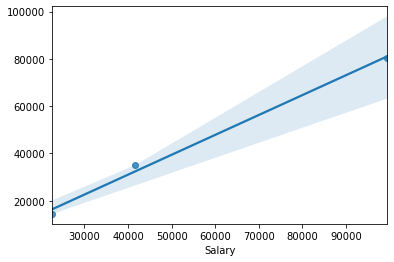

In [17]:
sns.regplot(Women_y_test,Women_predictions)

<AxesSubplot:xlabel='Salary'>

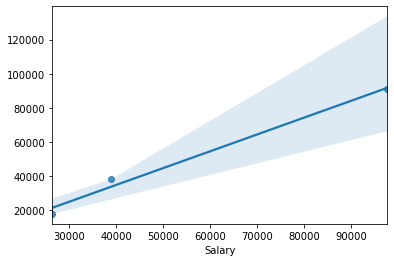

In [18]:
sns.regplot(Men_y_test,Men_predictions)

In [19]:
import statsmodels.api as sm
Woemn_X_train_Sm= sm.add_constant(Women_X_train)
Women_X_train_Sm= sm.add_constant(Women_X_train)
ls=sm.OLS(Women_y_train,Women_X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     8.411
Date:                Tue, 20 Jul 2021   Prob (F-statistic):             0.0569
Time:                        14:19:31   Log-Likelihood:                -72.032
No. Observations:                   7   AIC:                             152.1
Df Residuals:                       3   BIC:                             151.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.536e+04    7.7e+04  

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [20]:
import statsmodels.api as sm
Men_X_train_Sm= sm.add_constant(Men_X_train)
Men_X_train_Sm= sm.add_constant(Men_X_train)
ls=sm.OLS(Men_y_train,Men_X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     256.5
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           0.000410
Time:                        14:19:31   Log-Likelihood:                -60.367
No. Observations:                   7   AIC:                             128.7
Df Residuals:                       3   BIC:                             128.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.777e+04   3.92e+04  

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [32]:
import pandas as pd
from sklearn import linear_model
import tkinter as tk 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


# X = df[['Interest_Rate','Unemployment_Rate']].astype(float) # here we have 2 input variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
# Y = df['Stock_Index_Price'].astype(float) # output variable (what we are trying to predict)

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(Women_X, Women_Y)

print(regr.intercept_)
print('Coefficients: \n', regr.coef_)

# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

# Age label and input box
label1 = tk.Label(root, text=' Age: ')
canvas1.create_window(100, 80, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 80, window=entry1)

# Formal Education label and input box
label2 = tk.Label(root, text=' Formal Education: ')
canvas1.create_window(120, 100, window=label2)

entry2 = tk.Entry (root) # create 3rd entry box
canvas1.create_window(270, 100, window=entry2)

# Years Coding label and input box
label3 = tk.Label(root, text=' Years Coding: ')
canvas1.create_window(140, 120, window=label3)

entry3 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry3)

Women_model = LinearRegression()
Women_model.fit(Women_X, Women_Y)


def values(): 
    global Age #our 1st input variable
    Age = float(entry1.get()) 
    
    global Formal_Education #our 2nd input variable
    Formal_Education = float(entry2.get()) 
    
    global Years_Coding #our 3rd input variable
    Years_Coding = float(entry3.get()) 
    
    Prediction_result  = ('Predicted Womens Salary: ', Women_model.predict(np.array([[Age, Formal_Education, Years_Coding]])))
    label_Prediction = tk.Label(root, text = Prediction_result, bg='yellow')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Womens Salary',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 
#plot 1st scatter 
figure3 = plt.Figure(figsize=(4,3), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(Women_df['Age'].astype(float),Women_df['Salary'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend(['Salary']) 
ax3.set_xlabel('Age')
ax3.set_title('Age Vs. Salary')

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(4,3), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(Women_df['Formal_Education'].astype(float),Women_df['Salary'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend(['Salary']) 
ax4.set_xlabel('Formal Education')
ax4.set_title('Formal Education Vs. Salary')

#plot 2nd scatter 
figure5 = plt.Figure(figsize=(4,3), dpi=100)
ax5 = figure5.add_subplot(111)
ax5.scatter(Women_df['Years_Coding'].astype(float),Women_df['Salary'].astype(float), color = 'b')
scatter5 = FigureCanvasTkAgg(figure5, root) 
scatter5.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax5.legend(['Salary']) 
ax5.set_xlabel('Years Coding')
ax5.set_title('Years Coding Vs. Salary')

root.mainloop()

-32201.72846527167
Coefficients: 
 [1632.77211965  -78.53633802 5731.59056211]


In [28]:
Women_model.predict(np.array([[34, 3, 15]]))

array([109050.77302032])